In [1]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #matplotlib for plotting

In [2]:
# Importing the data
data = pd.read_csv("loan.csv")
data.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Checking type of columns, shape, missing value etc.
print(data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [4]:
# Checking shape of data before manipulation
data.shape

(39717, 111)

In [5]:
# Some columns seems to have all NA values
data.columns[data.isna().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [6]:
# Columns with all NA values cannot possibly contribute in any way in analysis, hence dropping them
data = data.dropna(axis=1, how="all")

In [7]:
# Shape of data after dropping columns with all NA
data.shape

(39717, 57)

In [8]:
# Still a lot of columns, how to find which columns are best suited for analysis
print(data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [9]:
# Some columns seem to have all zeros, find list of columns with mean 0
lst = data.mean() > 0
lst

C:\Users\user\AppData\Local\Temp/ipykernel_22276/4245716655.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lst = data.mean() > 0


id                             True
member_id                      True
loan_amnt                      True
funded_amnt                    True
funded_amnt_inv                True
installment                    True
annual_inc                     True
dti                            True
delinq_2yrs                    True
inq_last_6mths                 True
mths_since_last_delinq         True
mths_since_last_record         True
open_acc                       True
pub_rec                        True
revol_bal                      True
total_acc                      True
out_prncp                      True
out_prncp_inv                  True
total_pymnt                    True
total_pymnt_inv                True
total_rec_prncp                True
total_rec_int                  True
total_rec_late_fee             True
recoveries                     True
collection_recovery_fee        True
last_pymnt_amnt                True
collections_12_mths_ex_med    False
policy_code                 

In [10]:
#drop columns with mean 0
data.drop(labels=lst[lst==False].index.tolist(), inplace=True, axis=1)

In [11]:
#Dropping url column, not needed for EDA, Loan id is available in separate column
data.drop(labels=["url"], inplace=True, axis=1)
data.shape

(39717, 51)

In [12]:
# Checking columns after removing all NA and 0 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [13]:
# Cheking loan_status column
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [14]:
# loan_status : Charged Off - Defaulter, Fully Paid/Current - Not Defaulter
data_chargedoff = data[(data.loan_status=="Charged Off")]
data_fullypaid = data[(data.loan_status=="Fully Paid")]
print(data_chargedoff.shape)
print(data_fullypaid.shape)

(5627, 51)
(32950, 51)


In [15]:
data_CF = data[~(data.loan_status=="Current")]
data_CF.shape

(38577, 51)

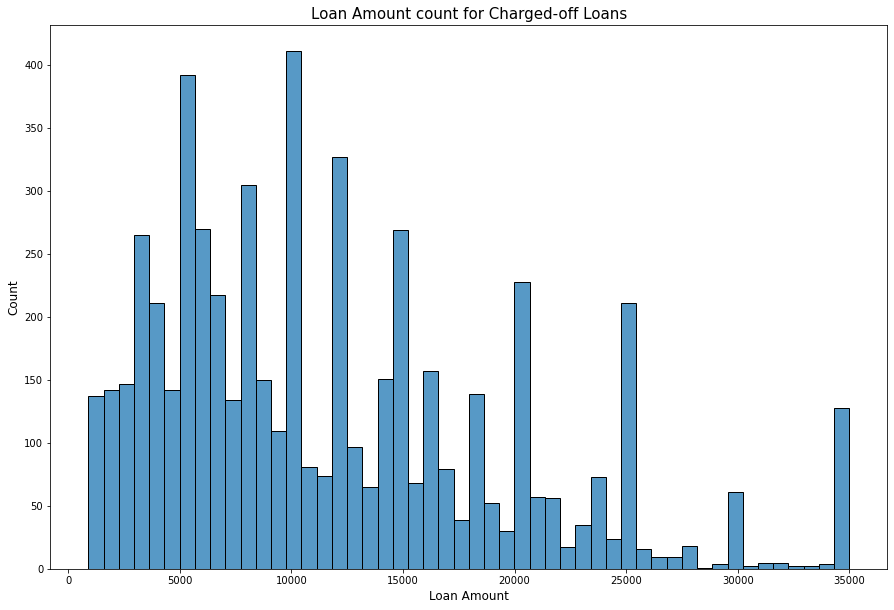

In [16]:
# univariate analysis on loan amount for Charged-off loans
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_chargedoff.funded_amnt, bins=50)
g.set_title("Loan Amount count for Charged-off Loans", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Loan Amount", fontsize=12)
plt.show()

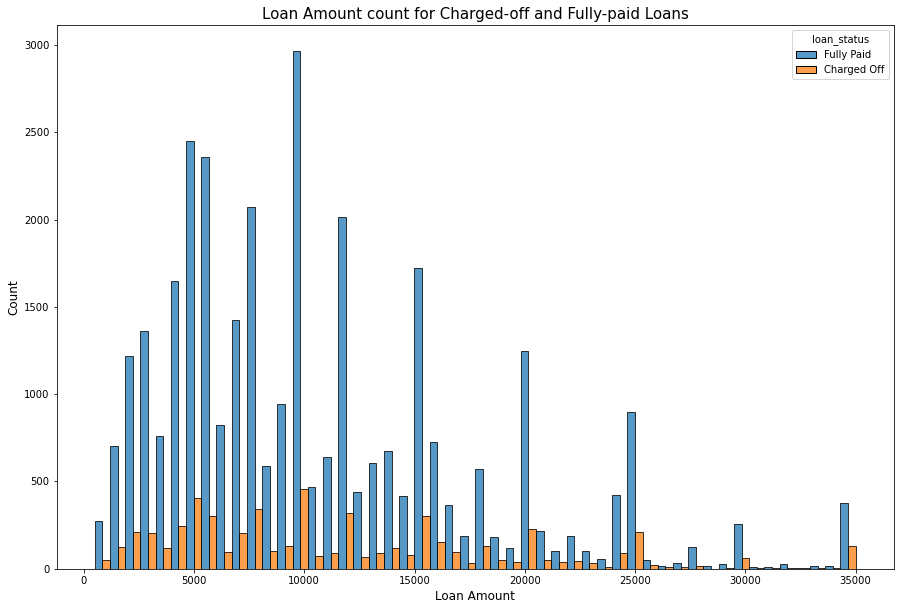

In [17]:
# Charged-off loans have spike at every 5000 of funded amount starting from 5000
# Let's compare the funded amount counts of charged-off and Fully paid loans
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="funded_amnt", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Loan Amount count for Charged-off and Fully-paid Loans", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Loan Amount", fontsize=12)
plt.show()

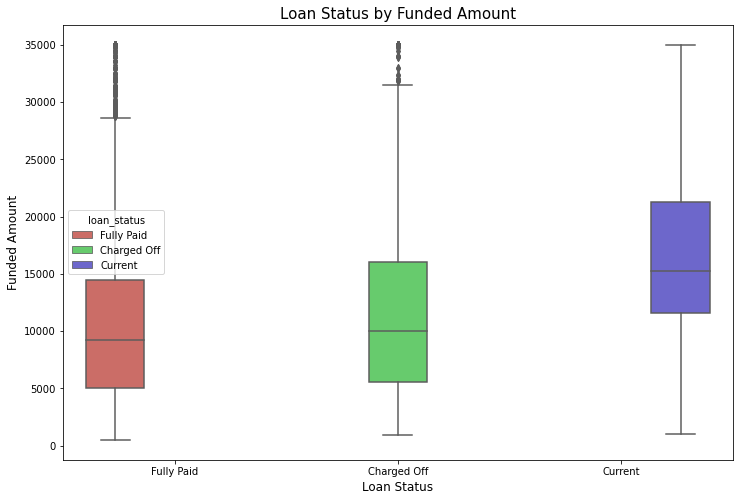

In [18]:
# Segmented-bivariate analysis on loan amount
fig, ax = plt.subplots(figsize=(12,8))
g2 = sns.boxplot(x="loan_status", y="funded_amnt",data=data, 
              palette="hls", hue="loan_status")
g2.set_title("Loan Status by Funded Amount", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Loan Status", fontsize=12)
plt.show()

# We are going to evaluate credit risk based on three factors - Character, Capacity and Conditions
1. Character - length of employments, pub_rec_bankruptcies, pub_rec, emp_title, verification_status, homeownership
2. Capacity - DTI, Annual income
3. Conditions - Interest rate, term length, installment, Purpose, revol_bal

In [19]:
data_CF.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

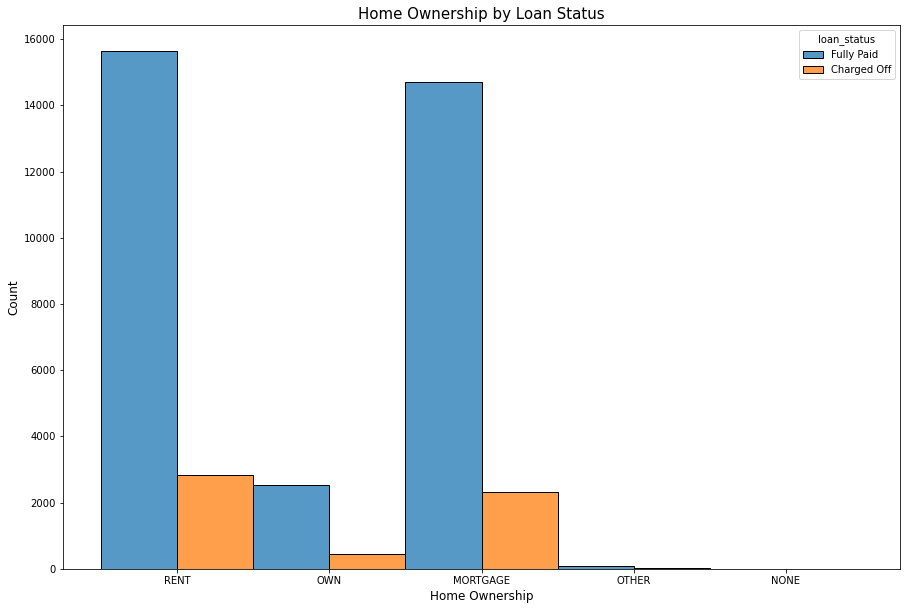

In [20]:
# Checking categorical variable home_ownership for charged-off and Fully-paid
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="home_ownership", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Home Ownership by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Home Ownership", fontsize=12)
plt.show()

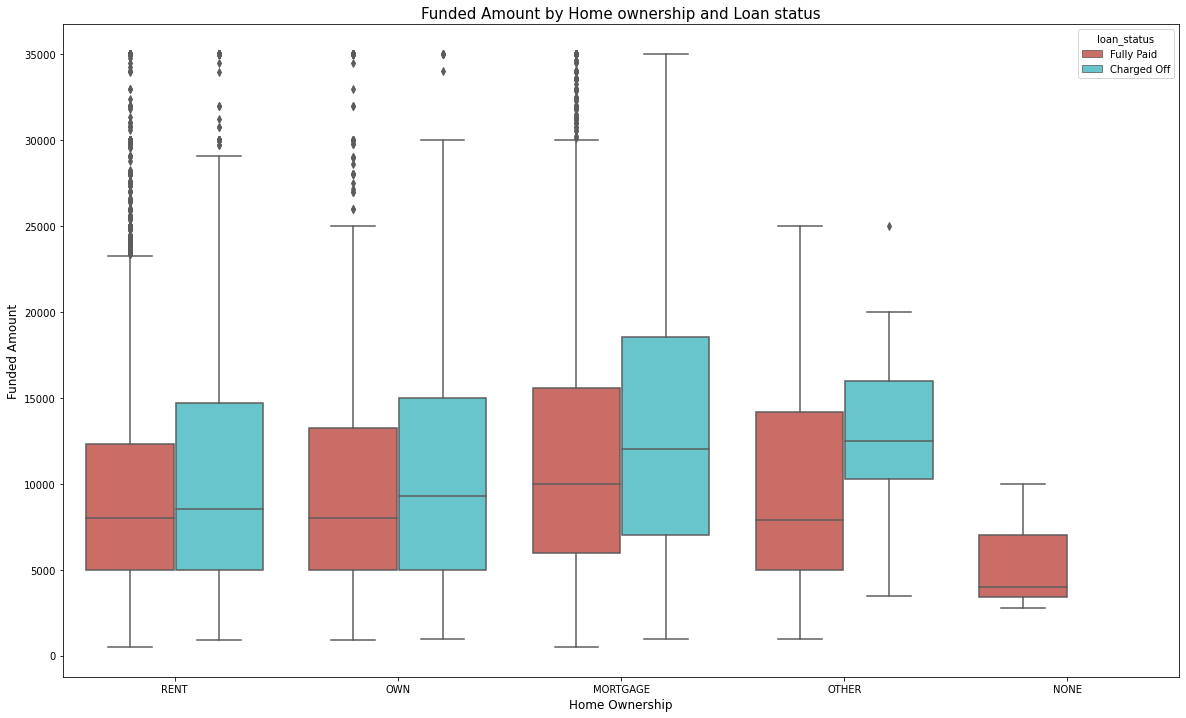

In [53]:
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.boxplot(x="home_ownership", y="funded_amnt",data=data_CF, 
              palette="hls", hue="loan_status")
g2.set_title("Funded Amount by Home ownership and Loan status", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Home Ownership", fontsize=12)
plt.show()

In [52]:
data_CF.groupby(["loan_status", "home_ownership"]).agg(["mean", "median"])

C:\Users\user\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims

id                member_id            \
                                     mean    median           mean    median   
loan_status home_ownership                                                     
Charged Off MORTGAGE        699630.408251  707632.0  870835.098410  899845.0   
            OTHER           393221.555556  405703.5  437660.888889  460296.5   
            OWN             697859.758465  685258.0  869775.485327  874555.0   
            RENT            698308.716802  690025.0  867636.342022  880358.0   
Fully Paid  MORTGAGE        683350.512182  667137.0  852506.691779  852690.0   
            NONE            158141.333333  121568.0  152646.666667  121574.0   
            OTHER           389872.512500  385412.0  429619.925000  412749.0   
            OWN             667164.937994  640357.0  831905.530806  818208.5   
            RENT            665163.021610  641733.0  827441.719391  821222.0   

                               loan_amnt            funded_amnt           \
                                    mean   median          mean   median   
loan_status home_ownership                                                 
Charged Off MORTGAGE        14095.186936  12000.0  13587.236786  12000.0   
            OTHER           13747.222222  14000.0  13326.388889  12500.0   
            OWN             11015.293454   9600.0  10761.455982   9275.0   
            RENT            10632.141599   9000.0  10395.095104   8550.0   
Fully Paid  MORTGAGE        12211.440044  10000.0  11880.182387  10000.0   
            NONE             5600.000000   4000.0   5600.000000   4000.0   
            OTHER            9969.062500   8500.0   9433.750000   7875.0   
            OWN              9984.626777   8000.0   9783.965245   8000.0   
            RENT             9751.257912   8000.0   9575.369222   8000.0   

                           funded_amnt_inv                ...  \
                                      mean        median  ...   
loan_status home_ownership                                ...   
Charged Off MORTGAGE          12534.848099  11500.000000  ...   
            OTHER              9546.124229  11167.890000  ...   
            OWN                9950.402801   8000.000000  ...   
            RENT               9646.428774   8000.000000  ...   
Fully Paid  MORTGAGE          11356.479259   9950.000000  ...   
            NONE               1592.686667   1625.000000  ...   
            OTHER              6861.935402   5928.580100  ...   
            OWN                9386.171501   7834.646709  ...   
            RENT               9080.389198   7850.000000  ...   

                           collection_recovery_fee         last_pymnt_amnt  \
                                              mean  median            mean   
loan_status home_ownership                                                   
Charged Off MORTGAGE                    102.884109  2.5302      365.489703   
            OTHER                       101.829478  3.7550      376.910000   
            OWN                         103.771486  2.5700      339.211806   
            RENT                         72.391168  2.4800      291.289003   
Fully Paid  MORTGAGE                      0.000000  0.0000     3755.412885   
            NONE                          0.000000  0.0000      177.716667   
            OTHER                         0.000000  0.0000     2080.685250   
            OWN                           0.000000  0.0000     3179.201074   
            RENT                          0.000000  0.0000     2602.681629   

                                     next_pymnt_d        policy_code         \
                              median         mean median        mean median   
loan_status home_ownership                                                    
Charged Off MORTGAGE         264.390          NaN    NaN         1.0    1.0   
            OTHER            386.425          NaN    NaN         1.0    1.0   
            OWN              236.900          NaN   

# Among Charged-off customers, those who have home ownership as mortgaged and Other, median of funded amount is the highest, around 12,000
What is OTHER for home ownership??

In [22]:
## Checking Employment length column
data_CF.emp_length.dtype

dtype('O')

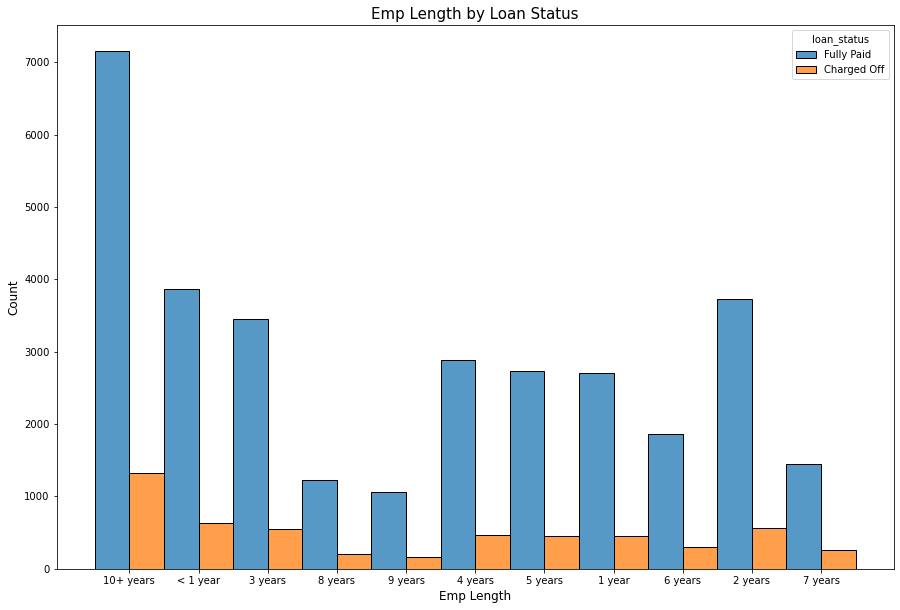

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="emp_length", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Emp Length by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Emp Length", fontsize=12)
plt.show()

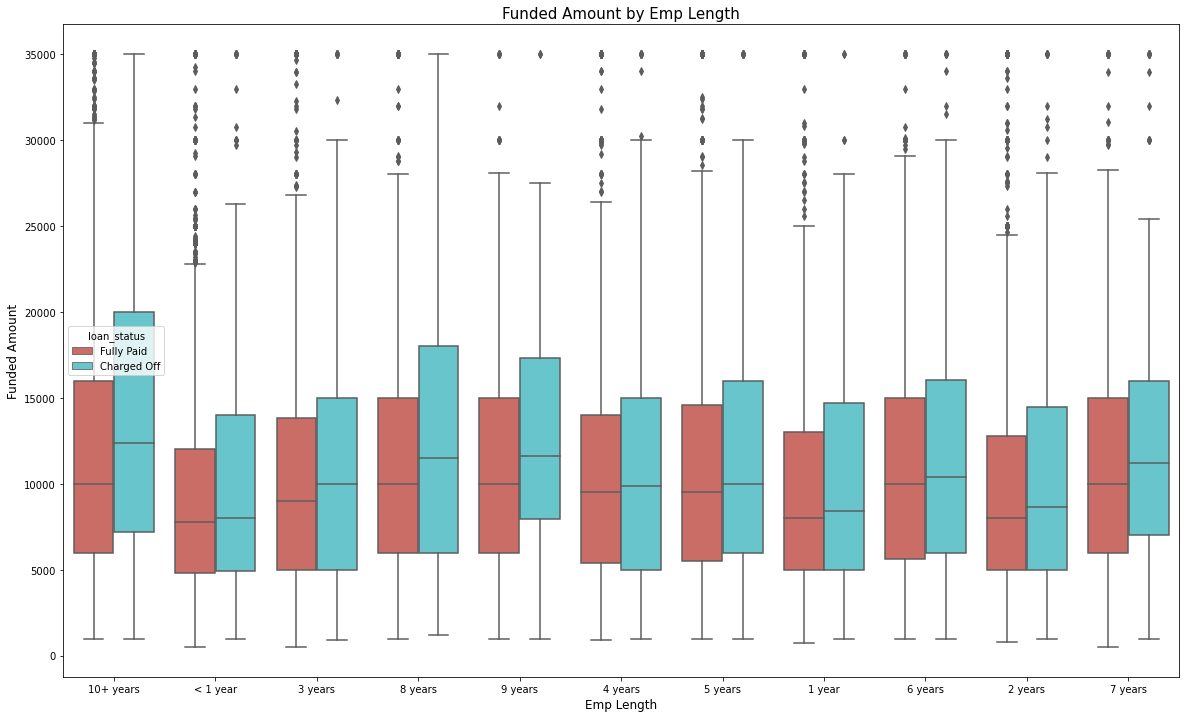

In [24]:
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.boxplot(x="emp_length", y="funded_amnt",data=data_CF, 
              palette="hls", hue="loan_status")
g2.set_title("Funded Amount by Emp Length", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Emp Length", fontsize=12)
plt.show()

# Median and 75th Percentile of Funded amount for Charged-off loans with 10+ years of employment is significantly higher
# For Loan Amount > 15000, more analysis needed for evaluating credit risk

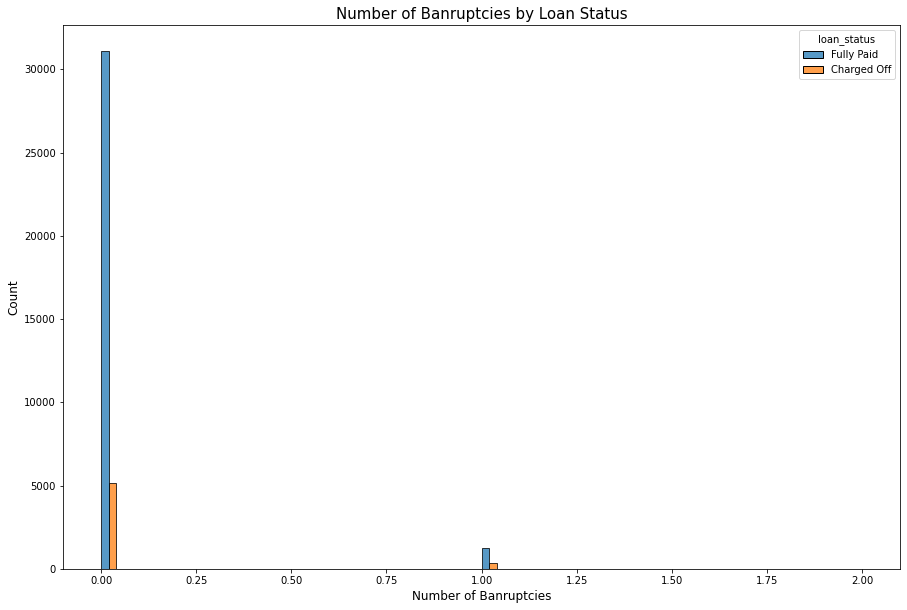

In [25]:
# Checcking pub_rec_bankruptcies
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="pub_rec_bankruptcies", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Number of Banruptcies by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Number of Banruptcies", fontsize=12)
plt.show()

# Most have no bankruptcies, a very small numbers of fully paid and Charged-off customers have 1 bankruptcy

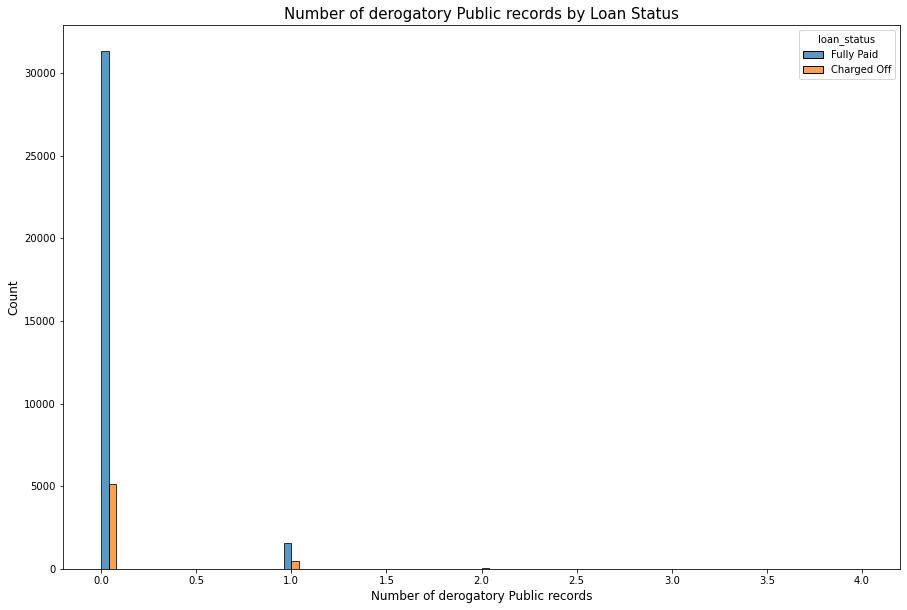

In [26]:
# Checking pub_rec
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="pub_rec", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Number of derogatory Public records by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Number of derogatory Public records", fontsize=12)
plt.show()

In [27]:
# Checking emp_title
emplst = data_CF.emp_title.value_counts() >20
emplst = emplst[emplst==True].index.tolist()

In [28]:
len(emplst)

50

In [29]:
data_CF_emptitle = data_CF[(data_CF.emp_title.isin(emplst))]
data_CF_emptitle.shape

(1885, 51)

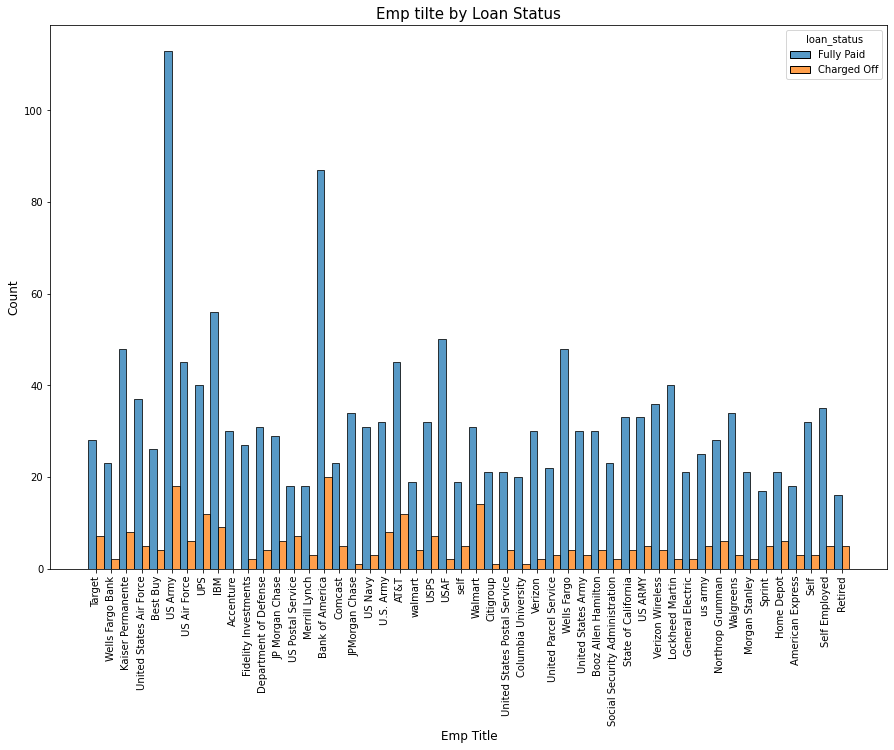

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF_emptitle, x="emp_title", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Emp tilte by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Emp Title", fontsize=12)
plt.xticks(rotation=90)
plt.show()

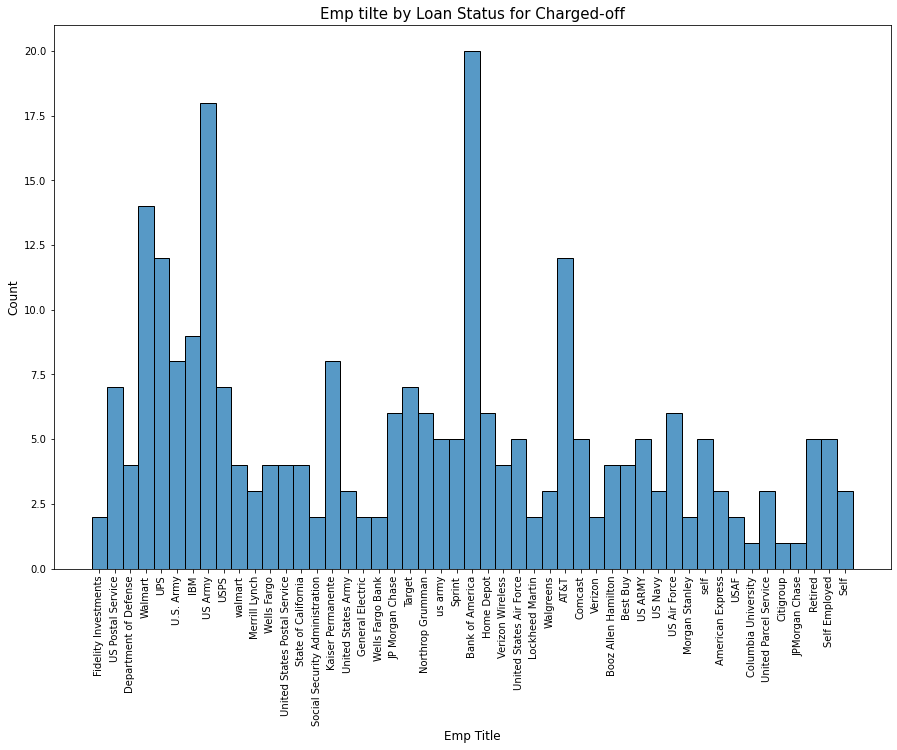

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF_emptitle[data_CF_emptitle.loan_status=="Charged Off"], x="emp_title", bins=50)
g.set_title("Emp tilte by Loan Status for Charged-off", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Emp Title", fontsize=12)
plt.xticks(rotation=90)
plt.show()

Top 3 Emp titles for Charged-off customers are Bank of America, US Army and Walmart

In [32]:
data_CF_emptitle["last_pymnt_year"] = data_CF_emptitle.last_pymnt_d.apply(lambda x: pd.to_datetime(x, format="%b-%y").year)

C:\Users\user\AppData\Local\Temp/ipykernel_22276/2718115911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_CF_emptitle["last_pymnt_year"] = data_CF_emptitle.last_pymnt_d.apply(lambda x: pd.to_datetime(x, format="%b-%y").year)


In [33]:
data_CF_emptitle.last_pymnt_year = data_CF_emptitle.last_pymnt_year.astype("str")

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [34]:
d = data_CF_emptitle[(data_CF_emptitle.loan_status=="Charged Off") & (data_CF_emptitle.emp_title.isin(["Bank of America", "US Army", "Walmart"]))]

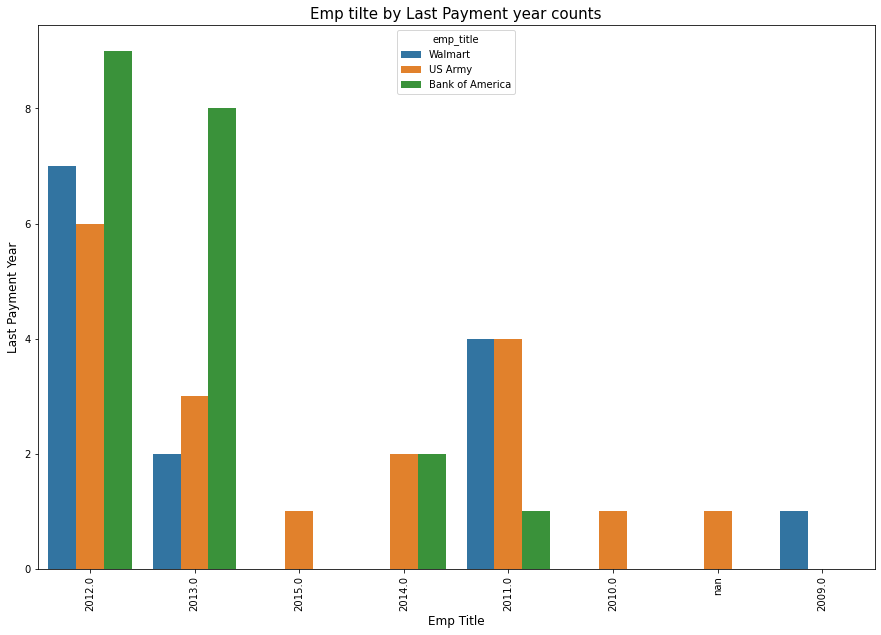

In [35]:
fig, ax = plt.subplots(figsize=(15,10))

g = sns.countplot(data=d, x="last_pymnt_year", hue="emp_title")
g.set_title("Emp tilte by Last Payment year counts", fontsize=15)
g.set_ylabel("Last Payment Year", fontsize=12)
g.set_xlabel("Emp Title", fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Bank of America had major job cuts during 2011-2012, hence maximum number of defaulters around that time

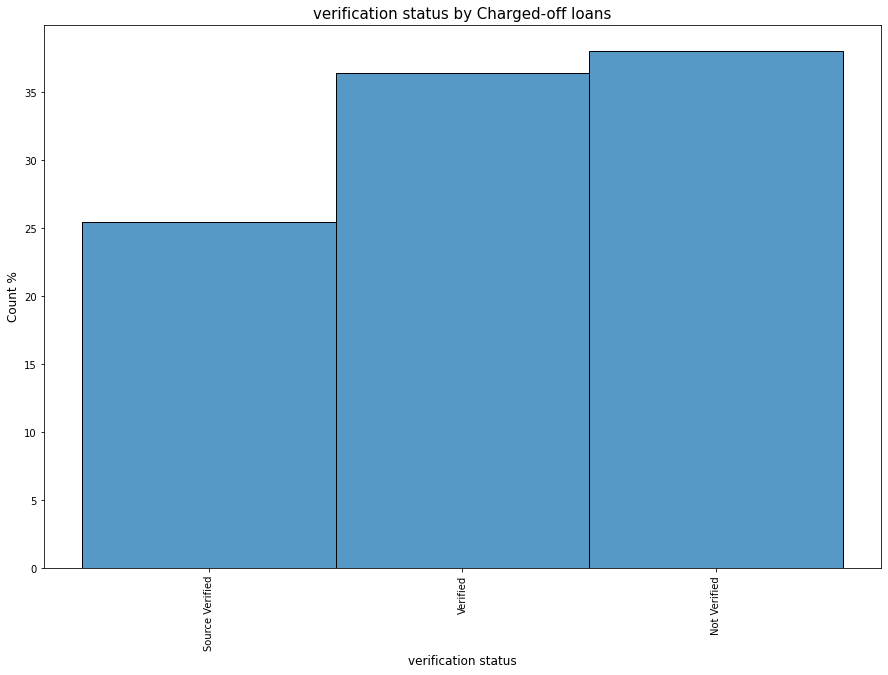

In [36]:
# Checking verification_status

fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF[data_CF.loan_status=="Charged Off"], x="verification_status", bins=50, stat="percent")
g.set_title("verification status by Charged-off loans", fontsize=15)
g.set_ylabel("Count %", fontsize=12)
g.set_xlabel("verification status", fontsize=12)
plt.xticks(rotation=90)
plt.show()

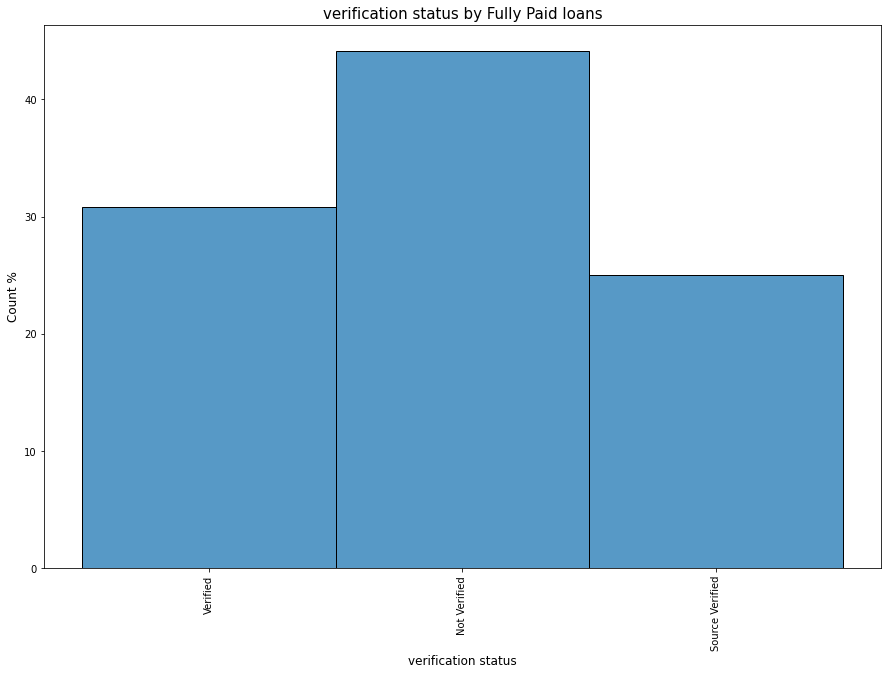

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF[data_CF.loan_status=="Fully Paid"], x="verification_status", bins=50, stat="percent")
g.set_title("verification status by Fully Paid loans", fontsize=15)
g.set_ylabel("Count %", fontsize=12)
g.set_xlabel("verification status", fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Analyzing Capacity

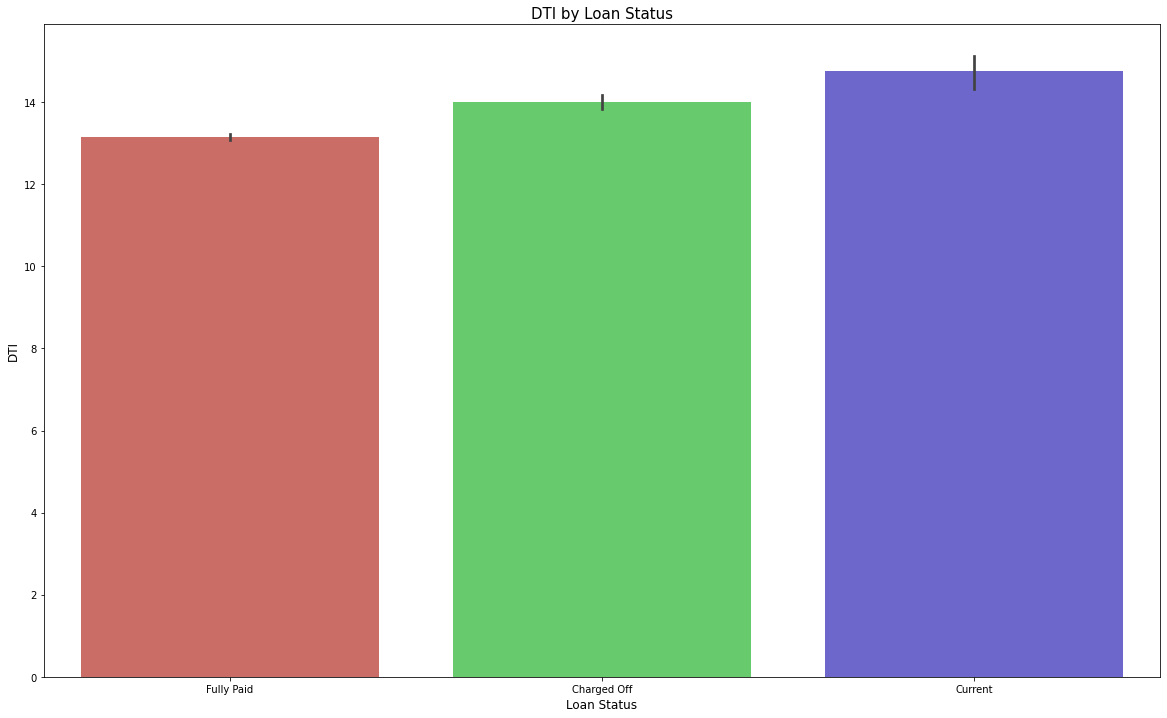

In [38]:
# Checking DTI
from numpy import mean

fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.barplot(x="loan_status", y="dti",data=data, palette="hls", estimator=mean)
g2.set_title("DTI by Loan Status", fontsize=15)
g2.set_ylabel("DTI", fontsize=12)
g2.set_xlabel("Loan Status", fontsize=12)
plt.show()


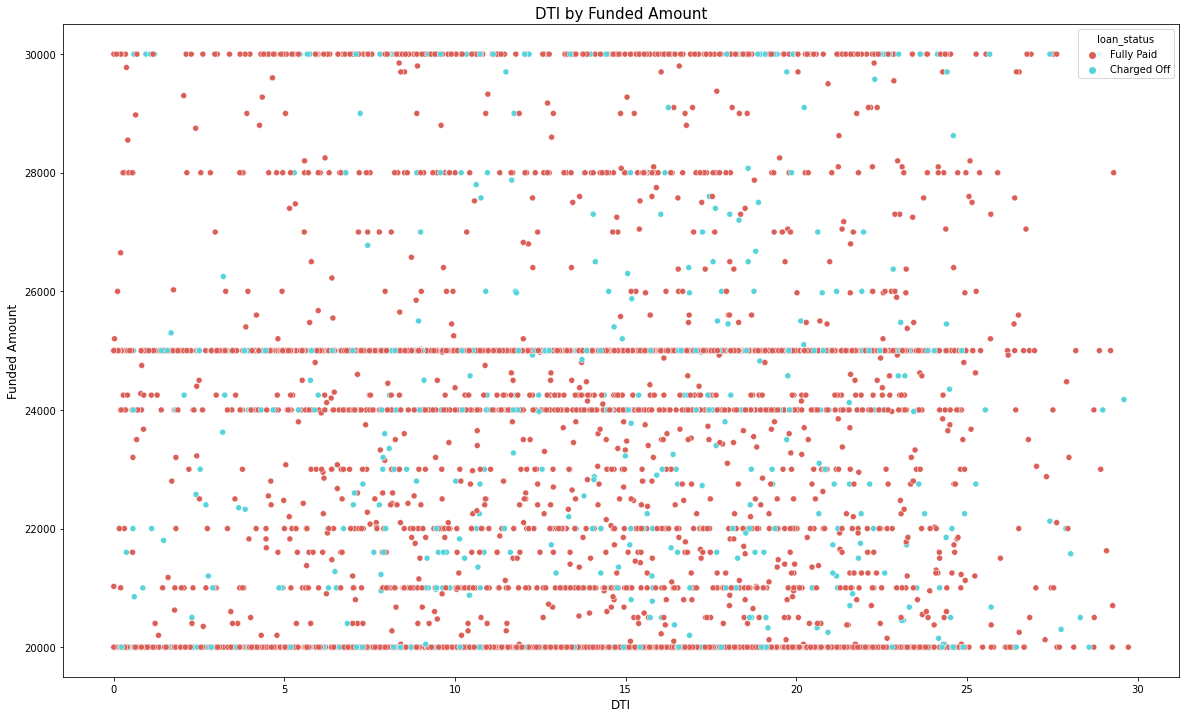

In [39]:
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.scatterplot(x="dti", y="funded_amnt",data=data_CF[(data_CF.funded_amnt>=20000) & (data_CF.funded_amnt<=30000)], palette="hls", hue="loan_status")
g2.set_title("DTI by Funded Amount", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("DTI", fontsize=12)
plt.show()

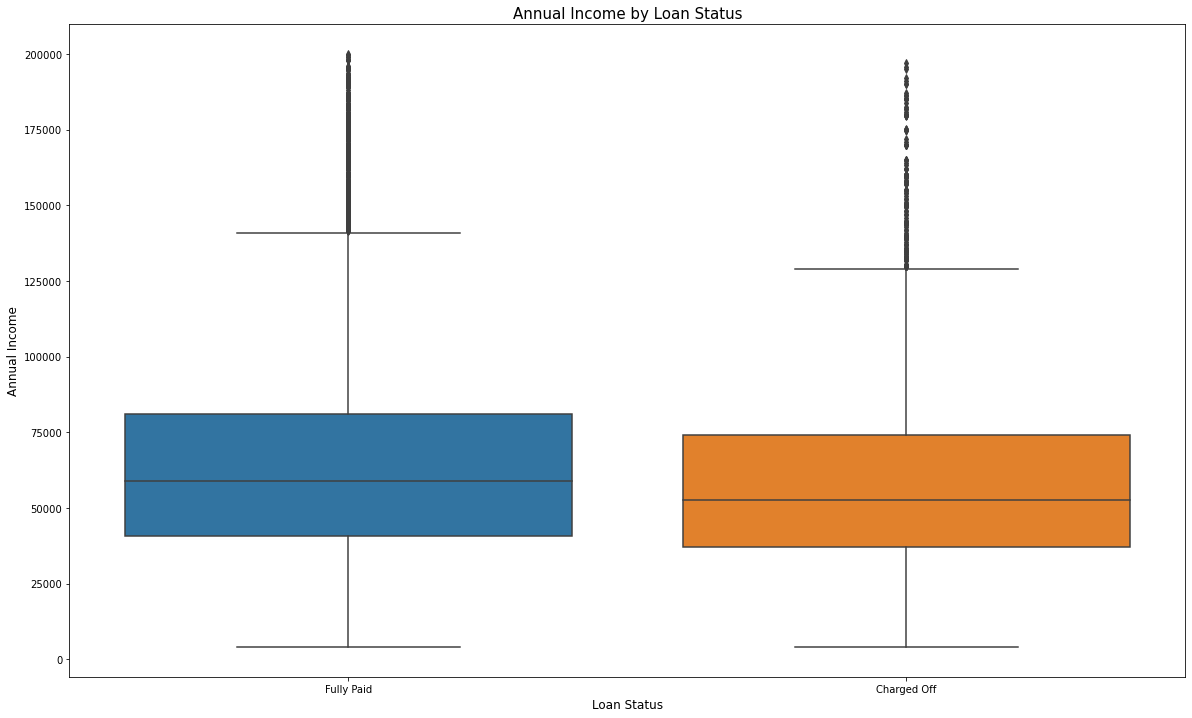

In [40]:
# Checking Annual Income
fig, ax = plt.subplots(figsize=(20,12))
plt.ticklabel_format(style='plain')
g2 = sns.boxplot(x="loan_status", y="annual_inc",data=data_CF[(data_CF.annual_inc<200000)])
g2.set_title("Annual Income by Loan Status", fontsize=15)
g2.set_ylabel("Annual Income", fontsize=12)
g2.set_xlabel("Loan Status", fontsize=12)
plt.show()

In [43]:
data_CF["annual_inc_bucket"] = data_CF.annual_inc.apply(lambda x: "low" if x<40000 else "mid" if (x>=40000) & (x<75000) else "high")

C:\Users\user\AppData\Local\Temp/ipykernel_22276/3565020182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_CF["annual_inc_bucket"] = data_CF.annual_inc.apply(lambda x: "low" if x<40000 else "mid" if (x>=40000) & (x<75000) else "high")


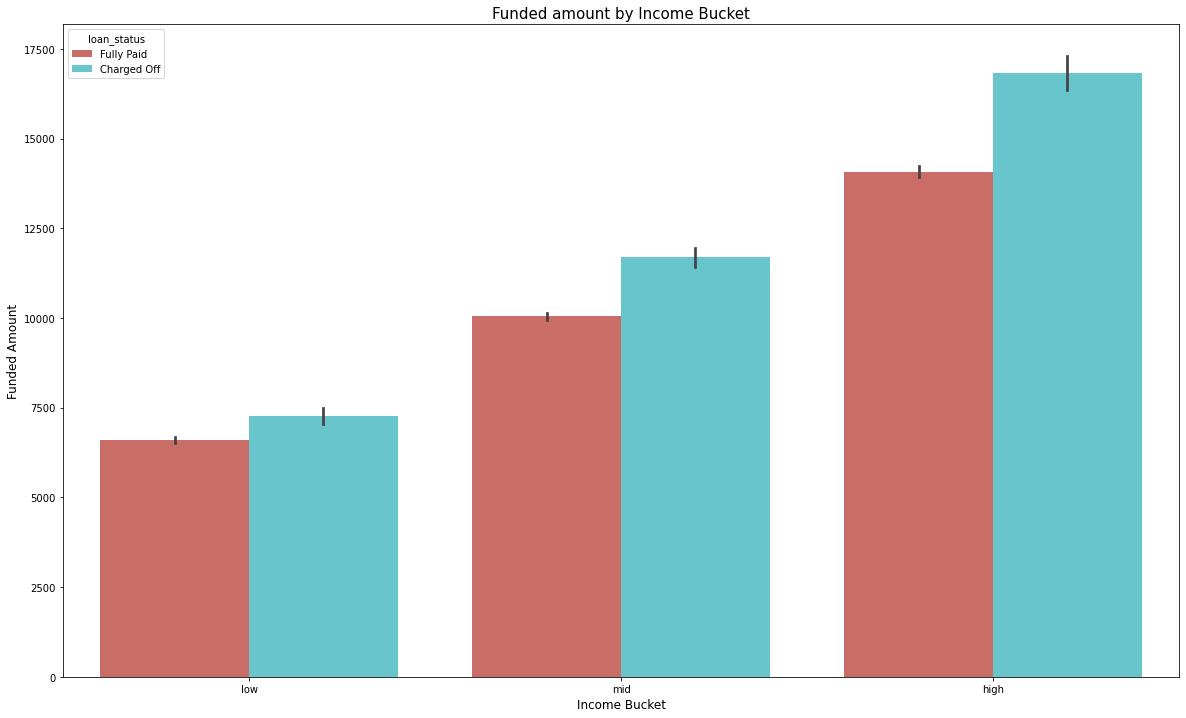

In [47]:
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.barplot(x="annual_inc_bucket", y="funded_amnt",data=data_CF, palette="hls", estimator=mean, hue="loan_status")
g2.set_title("Funded amount by Income Bucket", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Income Bucket", fontsize=12)
plt.show()

# Funded amount for Charged-off loan is higher than that of Fully paid loans across different income groups. Especially for High income group, charged-off loans have considerable higher funded amount.

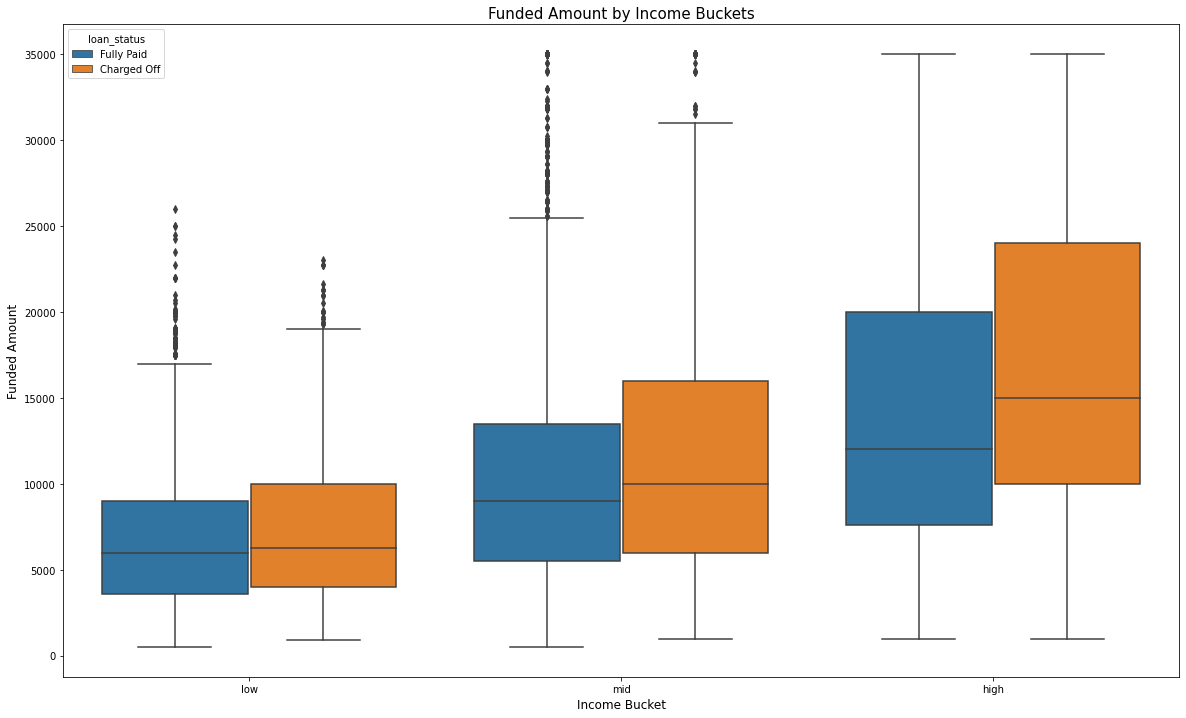

In [49]:
fig, ax = plt.subplots(figsize=(20,12))
plt.ticklabel_format(style='plain')
g2 = sns.boxplot(y="funded_amnt", x="annual_inc_bucket",data=data_CF[(data_CF.annual_inc<200000)], hue="loan_status")
g2.set_title("Funded Amount by Income Buckets", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Income Bucket", fontsize=12)
plt.show()

In [55]:
data_CF.groupby(["loan_status", "annual_inc_bucket", "home_ownership"])[["funded_amnt", "int_rate", "installment", "dti"]].agg(["mean", "median"])

funded_amnt           \
                                                      mean   median   
loan_status annual_inc_bucket home_ownership                          
Charged Off high              MORTGAGE        16980.379388  15350.0   
                              OTHER           18212.500000  17925.0   
                              OWN             17906.329114  18000.0   
                              RENT            16378.078556  15000.0   
            low               MORTGAGE         7753.027950   6975.0   
                              OTHER            8170.000000  10000.0   
                              OWN              7145.277778   6000.0   
                              RENT             7140.487132   6037.5   
            mid               MORTGAGE        12591.221034  12000.0   
                              OTHER           14019.444444  15000.0   
                              OWN             11231.385870  10000.0   
                              RENT            10959.960938  10000.0   
Fully Paid  high              MORTGAGE        14400.093876  12800.0   
                              NONE             3400.000000   3400.0   
                              OTHER           11190.178571   9500.0   
                              OWN             13878.462838  12000.0   
                              RENT            13480.868191  12000.0   
            low               MORTGAGE         7024.766977   6000.0   
                              NONE            10000.000000  10000.0   
                              OTHER            6939.473684   6500.0   
                              OWN              6658.730599   6000.0   
                              RENT             6456.980721   5600.0   
            mid               MORTGAGE        10260.043076   9350.0   
                              OTHER            9379.545455   9000.0   
                              OWN             10164.523121   9212.5   
                              RENT             9850.940753   9000.0   

                                             installment                 dti  \
                                                    mean   median       mean   
loan_status annual_inc_bucket home_ownership                                   
Charged Off high              MORTGAGE        480.636353  454.450  13.423533   
                              OTHER           625.925000  589.655   8.227500   
                              OWN             507.949873  491.300  12.473291   
                              RENT            479.361401  440.800  12.692972   
            low               MORTGAGE        218.569379  198.960  14.565404   
                              OTHER           247.686000  282.050  16.170000   
                              OWN             207.800944  172.805  14.206222   
                              RENT            213.450901  190.730  13.928033   
            mid               MORTGAGE        347.241052  315.630  14.769474   
                              OTHER           472.818889  481.420  13.617778   
                              OWN             318.889402  302.205  13.956630   
                              RENT            316.446797  282.250  14.209516   
Fully Paid  high              MORTGAGE        425.957119  373.330  12.202631   
                              NONE            108.530000  108.530  15.000000   
                              OTHER           374.394286  316.450  10.198214   
                              OWN             421.859341  353.000  11.374392   
                              RENT            416.361565  372.120  11.840075   
            low               MORTGAGE        210.965513  188.595  13.248569   
                              NONE            312.220000  312.220   5.240000   
                              OTHER           230.112105  208.620  10.825789   
                              OWN             204.532949  177.270  13.491353   
                              RENT            200.760367  174.030  

# Median of Funded amount for Charged-off loans in around 15,000, whereas for Fully paid loans it is around 12000. 